# Analyze EvoGFuzz

In [31]:
from evogfuzz_formalizations.calculator import GRAMMAR, INITIAL_INPUTS, prop

In [32]:
from evogfuzz import EvoGFuzz

In [33]:
from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s:  %(message)s"
)

evogfuzz = EvoGFuzz(
    grammar=GRAMMAR,
    inputs=INITIAL_INPUTS,
    prop=prop
)

In [34]:
result = evogfuzz.execute()

2023-01-11 13:44:30,626:  Fuzzing with EvoGFuzz
2023-01-11 13:44:30,627:  Executing input files
2023-01-11 13:44:30,627:  exec: [False, False, False, False]
2023-01-11 13:44:30,628:  inp: {'sqrt(28367)', 'cos(10)', 'sqrt(3)', 'tan(-12)'}
2023-01-11 13:44:30,628:  zip_list: [('sqrt(28367)', False), ('cos(10)', False), ('sqrt(3)', False), ('tan(-12)', False)]
2023-01-11 13:44:30,628:  New Learning.
2023-01-11 13:44:30,630:  Learned probabilistic grammar:
2023-01-11 13:44:30,630:  <start>                                 [('<arith_expr>', {'prob': None})]
2023-01-11 13:44:30,631:  <arith_expr>                            [('<function>(<number>)', {'prob': None})]
2023-01-11 13:44:30,631:  <function>                              [('sqrt', {'prob': 0.5}), ('sin', {'prob': 0.0}), ('cos', {'prob': 0.25}), ('tan', {'prob': 0.25})]
2023-01-11 13:44:30,631:  <number>                                [('<maybe_minus><onenine><maybe_digits><maybe_frac>', {'prob': None})]
2023-01-11 13:44:30,631:  <may

In [35]:
result = evogfuzz._get_latest_grammar()

In [36]:
result

{'<start>': [('<arith_expr>', {'prob': None})],
 '<arith_expr>': [('<function>(<number>)', {'prob': None})],
 '<function>': [('sqrt', {'prob': 0.3}),
  ('sin', {'prob': 0.0}),
  ('cos', {'prob': 0.3}),
  ('tan', {'prob': 0.4})],
 '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
   {'prob': None})],
 '<maybe_minus>': [('', {'prob': 0.0}), ('-', {'prob': 1.0})],
 '<onenine>': [('1', {'prob': 0.10862527091727668}),
  ('2', {'prob': 0.015494053144589728}),
  ('3', {'prob': 0.043420385404745694}),
  ('4', {'prob': 0.14186061463238145}),
  ('5', {'prob': 0.06383795598774213}),
  ('6', {'prob': 0.2475096599148384}),
  ('7', {'prob': 0.0812453561442831}),
  ('8', {'prob': 0.12220370082583527}),
  ('9', {'prob': 0.1758030030283075})],
 '<digit>': [('0', {'prob': 0.19047619047619047}),
  ('1', {'prob': 0.09523809523809523}),
  ('2', {'prob': 0.0}),
  ('3', {'prob': 0.19047619047619047}),
  ('4', {'prob': 0.19047619047619047}),
  ('5', {'prob': 0.09523809523809523}),
  ('6', {'pr

In [37]:
from fuzzingbook.ProbabilisticGrammarFuzzer import ProbabilisticGrammarFuzzer

prob_fuzzer = ProbabilisticGrammarFuzzer(result)

for _ in range(100):
    print(prob_fuzzer.fuzz())

sqrt(-500)
sqrt(-7414)
tan(-670)
cos(-693059)
sqrt(-94)
tan(-604703)
cos(-987)
sqrt(-3485)
cos(-61)
sqrt(-33337)
tan(-698)
cos(-64)
cos(-9748)
cos(-71338)
cos(-600)
sqrt(-507)
tan(-6983380)
sqrt(-90)
sqrt(-600109)
sqrt(-48)
cos(-790)
cos(-63)
tan(-64)
cos(-60)
sqrt(-3447)
tan(-64)
cos(-43)
sqrt(-24)
cos(-441)
cos(-680907)
sqrt(-10)
tan(-94)
cos(-4413)
cos(-63)
sqrt(-70)
tan(-6140)
sqrt(-13107)
sqrt(-95)
cos(-134)
sqrt(-60)
tan(-93)
sqrt(-1113135)
cos(-93330)
tan(-43)
cos(-4379)
sqrt(-180)
sqrt(-900)
tan(-63053)
tan(-13)
tan(-47)
tan(-41)
sqrt(-37)
cos(-170)
tan(-60)
cos(-93)
tan(-281)
tan(-1074)
cos(-17384)
cos(-970)
cos(-87)
cos(-67)
sqrt(-639)
tan(-90)
tan(-1504308)
tan(-90470)
tan(-67)
sqrt(-473)
sqrt(-35)
sqrt(-953)
cos(-4747)
tan(-841)
cos(-115415003)
tan(-68047)
sqrt(-115)
sqrt(-8140)
tan(-6704743)
tan(-64193)
tan(-939741)
sqrt(-67)
tan(-67)
sqrt(-64419)
cos(-93)
tan(-61)
sqrt(-21)
tan(-945403)
sqrt(-6443)
tan(-813704404)
sqrt(-845)
tan(-61)
sqrt(-44)
sqrt(-103)
tan(-951047)
tan(

## Visualizing the Optimization

In [38]:
from matplotlib.pyplot import plot

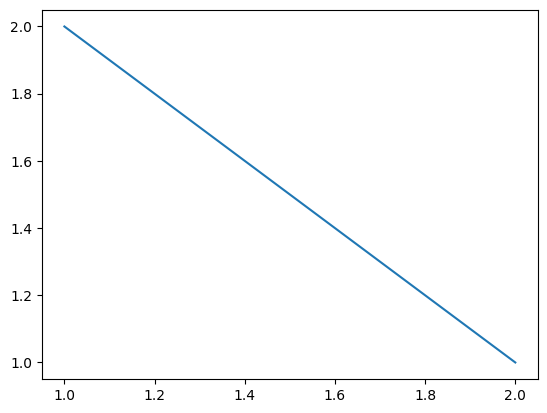

In [39]:
plot([1,2], [2,1])

In [40]:
result.keys()

dict_keys(['<start>', '<arith_expr>', '<function>', '<number>', '<maybe_minus>', '<onenine>', '<digit>', '<maybe_digits>', '<digits>', '<maybe_frac>'])

In [41]:
from copy import deepcopy
g = deepcopy(result)

features = set()

for rule in g:
    for child in g[rule]:
        features.add(f"{rule}->{child[1]['prob']}")

In [42]:
display(features)

{'<arith_expr>->None',
 '<digit>->0.0',
 '<digit>->0.047619047619047616',
 '<digit>->0.09523809523809523',
 '<digit>->0.14285714285714285',
 '<digit>->0.19047619047619047',
 '<digits>->0.47619047619047616',
 '<digits>->0.5238095238095238',
 '<function>->0.0',
 '<function>->0.3',
 '<function>->0.4',
 '<maybe_digits>->0.0',
 '<maybe_digits>->1.0',
 '<maybe_frac>->0.0',
 '<maybe_frac>->1.0',
 '<maybe_minus>->0.0',
 '<maybe_minus>->1.0',
 '<number>->None',
 '<onenine>->0.015494053144589728',
 '<onenine>->0.043420385404745694',
 '<onenine>->0.06383795598774213',
 '<onenine>->0.0812453561442831',
 '<onenine>->0.10862527091727668',
 '<onenine>->0.12220370082583527',
 '<onenine>->0.14186061463238145',
 '<onenine>->0.1758030030283075',
 '<onenine>->0.2475096599148384',
 '<start>->None'}

In [43]:
gr = [g, g]

def _initialize(g):
    g = deepcopy(g)
    probabilities = dict()
    for rule in g:
        for child in g[rule]:
            feature = f"{rule}->{child[0]}"
            probabilities[feature] = []
    return probabilities



def parse_prob_grammars(grammar_list):
    probabilities = _initialize(grammar_list[0])

    for grammar in grammar_list:
        for rule in grammar:
            for child in grammar[rule]:
                feature = f"{rule}->{child[0]}"
                prob_list = probabilities[feature]
                if child[1]['prob'] is None:
                    prob_list.append(1.0)
                else:
                    prob_list.append(child[1]['prob'])
                probabilities[feature] = prob_list

    return probabilities


r = parse_prob_grammars(gr)

In [44]:
display(r)

{'<start>-><arith_expr>': [1.0, 1.0],
 '<arith_expr>-><function>(<number>)': [1.0, 1.0],
 '<function>->sqrt': [0.3, 0.3],
 '<function>->sin': [0.0, 0.0],
 '<function>->cos': [0.3, 0.3],
 '<function>->tan': [0.4, 0.4],
 '<number>-><maybe_minus><onenine><maybe_digits><maybe_frac>': [1.0, 1.0],
 '<maybe_minus>->': [0.0, 0.0],
 '<maybe_minus>->-': [1.0, 1.0],
 '<onenine>->1': [0.10862527091727668, 0.10862527091727668],
 '<onenine>->2': [0.015494053144589728, 0.015494053144589728],
 '<onenine>->3': [0.043420385404745694, 0.043420385404745694],
 '<onenine>->4': [0.14186061463238145, 0.14186061463238145],
 '<onenine>->5': [0.06383795598774213, 0.06383795598774213],
 '<onenine>->6': [0.2475096599148384, 0.2475096599148384],
 '<onenine>->7': [0.0812453561442831, 0.0812453561442831],
 '<onenine>->8': [0.12220370082583527, 0.12220370082583527],
 '<onenine>->9': [0.1758030030283075, 0.1758030030283075],
 '<digit>->0': [0.19047619047619047, 0.19047619047619047],
 '<digit>->1': [0.09523809523809523,

In [45]:
all_prob_grammars_org = evogfuzz._probabilistic_grammars
all_prob_grammars = [g[0] for g in all_prob_grammars_org]

In [46]:
# all_prob_grammars = [g[0] for g in all_prob_grammars]

In [47]:
r = parse_prob_grammars(all_prob_grammars)

In [48]:
display(r)

{'<start>-><arith_expr>': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<arith_expr>-><function>(<number>)': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sqrt': [0.5,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.6,
  0.6,
  0.9,
  0.40458924201674124,
  0.8,
  0.8,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.19122255850095415,
  0.3,
  0.3],
 '<function>->sin': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1388522949149471,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.039408795023880755,
  0.0,
  0.0],
 '<function>->cos': [0.25,
  0.2,
  0.2,
  0.2,
  0.2,
  0.3,
  0.3,
  0.3,
  0.3,
  0.1,
  0.35606951002684784,
  0.2,
  0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.40250611177460077,
  0.3,
  0.3],
 '<function>->tan': [0.25,
  0.4,
  0.4,
 

In [49]:
from evogfuzz.evogfuzz_class import GrammarType
reduced = list(filter(lambda x: x[1] == GrammarType.LEARNED or GrammarType.MUTATED, all_prob_grammars_org))
reduced = [g[0] for g in reduced]
print(len(reduced))
dicts = parse_prob_grammars(reduced)

21


In [50]:
display(dicts)

{'<start>-><arith_expr>': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<arith_expr>-><function>(<number>)': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '<function>->sqrt': [0.5,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.4,
  0.6,
  0.6,
  0.9,
  0.40458924201674124,
  0.8,
  0.8,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.19122255850095415,
  0.3,
  0.3],
 '<function>->sin': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1388522949149471,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.039408795023880755,
  0.0,
  0.0],
 '<function>->cos': [0.25,
  0.2,
  0.2,
  0.2,
  0.2,
  0.3,
  0.3,
  0.3,
  0.3,
  0.1,
  0.35606951002684784,
  0.2,
  0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.40250611177460077,
  0.3,
  0.3],
 '<function>->tan': [0.25,
  0.4,
  0.4,
 

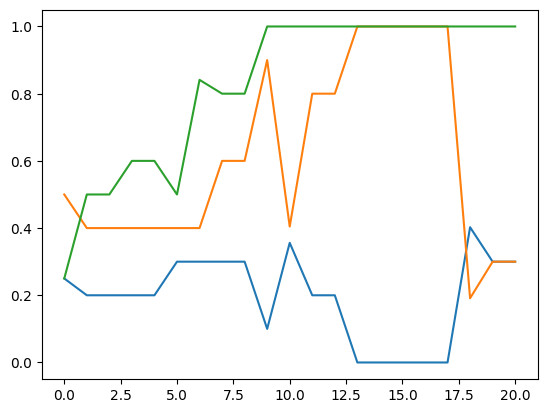

In [59]:
import matplotlib.pyplot as plt

xvals = [i for i in range(len(reduced))]

f, ax = plt.subplots(1)

feature_disp = ['<function>->cos', '<function>->sqrt', '<maybe_minus>->-']

for feature in feature_disp:
    ax.plot(xvals, dicts[feature])


In [52]:
display(evogfuzz._probabilistic_grammars)

[({'<start>': [('<arith_expr>', {'prob': None})],
   '<arith_expr>': [('<function>(<number>)', {'prob': None})],
   '<function>': [('sqrt', {'prob': 0.5}),
    ('sin', {'prob': 0.0}),
    ('cos', {'prob': 0.25}),
    ('tan', {'prob': 0.25})],
   '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
     {'prob': None})],
   '<maybe_minus>': [('', {'prob': 0.75}), ('-', {'prob': 0.25})],
   '<onenine>': [('1', {'prob': 0.5}),
    ('2', {'prob': 0.25}),
    ('3', {'prob': 0.25}),
    ('4', {'prob': 0.0}),
    ('5', {'prob': 0.0}),
    ('6', {'prob': 0.0}),
    ('7', {'prob': 0.0}),
    ('8', {'prob': 0.0}),
    ('9', {'prob': 0.0})],
   '<digit>': [('0', {'prob': 0.16666666666666666}),
    ('1', {'prob': 0.0}),
    ('2', {'prob': 0.16666666666666666}),
    ('3', {'prob': 0.16666666666666666}),
    ('4', {'prob': 0.0}),
    ('5', {'prob': 0.0}),
    ('6', {'prob': 0.16666666666666666}),
    ('7', {'prob': 0.16666666666666666}),
    ('8', {'prob': 0.16666666666666666}),
    ('9

### Plot Fitness Values

In [69]:
fitness_values = [(x[2],x[1]) for x in all_prob_grammars_org[:]]
print("Original")
display(fitness_values)


from typing import Tuple, List

def clean_fitness_values(fitness_values: List[Tuple[int, GrammarType]]):
    for index, it in enumerate(fitness_values):
        if it[0] == -1:
            fitness_values[index] = (fitness_values[index-1][0], it[1])

    return fitness_values

res = clean_fitness_values(fitness_values)
print("Clean")
display(res)

Original


[(3, <GrammarType.LEARNED: 'learned'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (2, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (6, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (9, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (8, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.MUTATED: 'mutated'>),
 (-1, <GrammarType.LEARNED: 'learned'>),
 (-1, <GrammarType.MUTATED: 'mutated'>)]

Clean


[(3, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.MUTATED: 'mutated'>),
 (3, <GrammarType.LEARNED: 'learned'>),
 (2, <GrammarType.MUTATED: 'mutated'>),
 (2, <GrammarType.LEARNED: 'learned'>),
 (6, <GrammarType.MUTATED: 'mutated'>),
 (6, <GrammarType.LEARNED: 'learned'>),
 (9, <GrammarType.MUTATED: 'mutated'>),
 (9, <GrammarType.LEARNED: 'learned'>),
 (8, <GrammarType.MUTATED: 'mutated'>),
 (8, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (10, <GrammarType.MUTATED: 'mutated'>),
 (10, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.MUTATED: 'mutated'>),
 (3, <GrammarType.LEARNED: 'learned'>),
 (3, <GrammarType.MUTATED: 'mutated'>)]

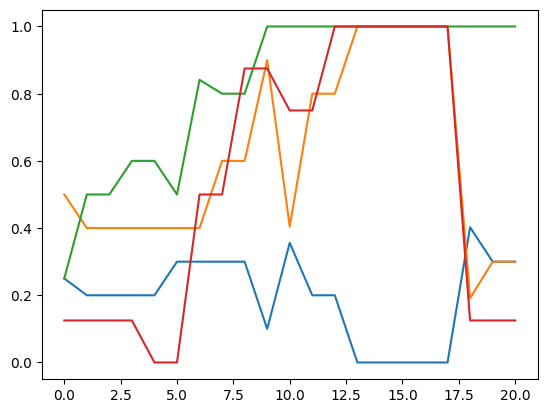

In [93]:
import matplotlib.pyplot as plt

xvals = [i for i in range(len(reduced))]

f, ax = plt.subplots(1)

feature_disp = ['<function>->cos', '<function>->sqrt', '<maybe_minus>->-']
# feature_disp = dicts.keys()

for feature in feature_disp:
    ax.plot(xvals, dicts[feature])

xvals = [i for i in range(len(res))]
yvals = [i[0] for i in res]

import numpy as np

def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

p = normalizeData(yvals)

ax.plot(xvals, p)

In [54]:
data = zip({1,2,3}, [False,False,False])

In [55]:
from fuzzingbook.ProbabilisticGrammarFuzzer import ProbabilisticGrammarMiner
from fuzzingbook.Parser import EarleyParser
from copy import deepcopy

new_g = deepcopy(GRAMMAR)
new_g['<maybe_minus>'] = ['', '-']

probabilistic_grammar_miner = ProbabilisticGrammarMiner(EarleyParser(new_g), log=True)
probabilistic_grammar = probabilistic_grammar_miner.mine_probabilistic_grammar(['sqrt(12)', 'tan(-1)'])

Found <start> -> <arith_expr>
Found <arith_expr> -> <function>(<number>)
Found <function> -> sqrt
Found <number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>
Found <maybe_minus> -> 
Found <onenine> -> 1
Found <maybe_digits> -> <digits>
Found <digits> -> <digit>
Found <digit> -> 2
Found <maybe_frac> -> 
Found <start> -> <arith_expr>
Found <arith_expr> -> <function>(<number>)
Found <function> -> tan
Found <number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>
Found <maybe_minus> -> -
Found <onenine> -> 1
Found <maybe_digits> -> 
Found <maybe_frac> -> 
['sqrt', 'sin', 'cos', 'tan']
{'<start> -> <arith_expr>': 2, '<arith_expr> -> <function>(<number>)': 2, '<function> -> sqrt': 1, '<number> -> <maybe_minus><onenine><maybe_digits><maybe_frac>': 2, '<maybe_minus> -> ': 1, '<onenine> -> 1': 2, '<maybe_digits> -> <digits>': 1, '<digits> -> <digit>': 1, '<digit> -> 2': 1, '<maybe_frac> -> ': 2, '<function> -> tan': 1, '<maybe_minus> -> -': 1, '<maybe_digits> -> ': 1}
['sqrt', 'sin',

In [56]:
display(probabilistic_grammar)

{'<start>': [('<arith_expr>', {'prob': None})],
 '<arith_expr>': [('<function>(<number>)', {'prob': None})],
 '<function>': [('sqrt', {'prob': 0.5}),
  ('sin', {'prob': 0.0}),
  ('cos', {'prob': 0.0}),
  ('tan', {'prob': 0.5})],
 '<number>': [('<maybe_minus><onenine><maybe_digits><maybe_frac>',
   {'prob': None})],
 '<maybe_minus>': [('', {'prob': 0.5}), ('-', {'prob': 0.5})],
 '<onenine>': [('1', {'prob': 1.0}),
  ('2', {'prob': 0.0}),
  ('3', {'prob': 0.0}),
  ('4', {'prob': 0.0}),
  ('5', {'prob': 0.0}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.0}),
  ('8', {'prob': 0.0}),
  ('9', {'prob': 0.0})],
 '<digit>': [('0', {'prob': 0.0}),
  ('1', {'prob': 0.0}),
  ('2', {'prob': 1.0}),
  ('3', {'prob': 0.0}),
  ('4', {'prob': 0.0}),
  ('5', {'prob': 0.0}),
  ('6', {'prob': 0.0}),
  ('7', {'prob': 0.0}),
  ('8', {'prob': 0.0}),
  ('9', {'prob': 0.0})],
 '<maybe_digits>': [('', {'prob': 0.5}), ('<digits>', {'prob': 0.5})],
 '<digits>': [('<digit>', {'prob': 1.0}), ('<digit><digits>', {'pro

In [57]:
p = EarleyParser(GRAMMAR)
for t in p.parse('sqrt(10)'):
    print(t)

('<start>', [('<arith_expr>', [('<function>', [('sqrt', [])]), ('(', []), ('<number>', [('<maybe_minus>', []), ('<onenine>', [('1', [])]), ('<maybe_digits>', [('<digits>', [('<digit>', [('0', [])])])]), ('<maybe_frac>', [])]), (')', [])])])


In [58]:
x = []
type(len(x))

int